<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Import the required libraries we need for the lab.


In [6]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [7]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Task 2: Generate Descriptive Statistics and Visualizations

1. For the "Median value of owner-occupied homes" provide a boxplot.

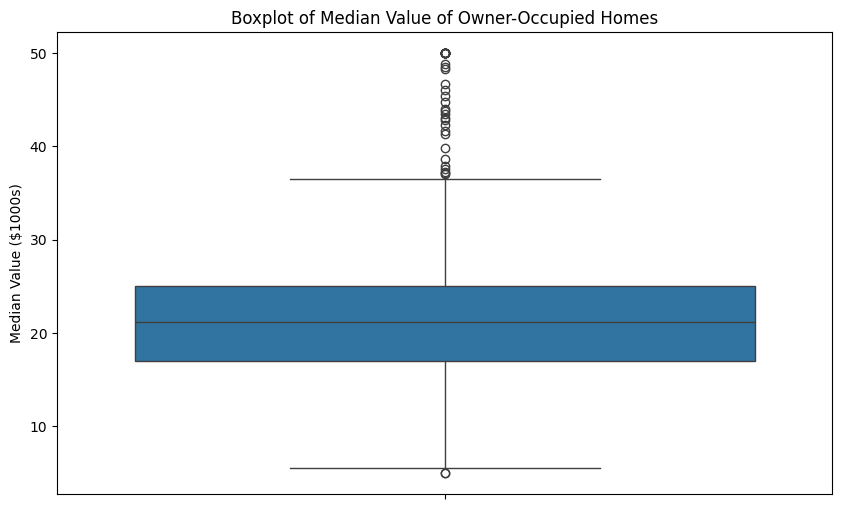

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value ($1000s)')
plt.show()



Boxplot statystics as explanation: 

In [9]:
# Extract boxplot statistics
boxplot_stats = sns.boxplot(y=boston_df['MEDV']).get_lines()
plt.close()

# Extract the statistics
q1 = boxplot_stats[0].get_ydata()[0]
median = boxplot_stats[1].get_ydata()[0]
q3 = boxplot_stats[2].get_ydata()[0]
lower_whisker = boxplot_stats[3].get_ydata()[0]
upper_whisker = boxplot_stats[4].get_ydata()[0]

# Print the statistics
print(f"Q1 (25th percentile): {q1}")
print(f"Median (50th percentile): {median}")
print(f"Q3 (75th percentile): {q3}")
print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")

Q1 (25th percentile): 17.025
Median (50th percentile): 25.0
Q3 (75th percentile): 5.6
Lower Whisker: 36.5
Upper Whisker: 21.2


2. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

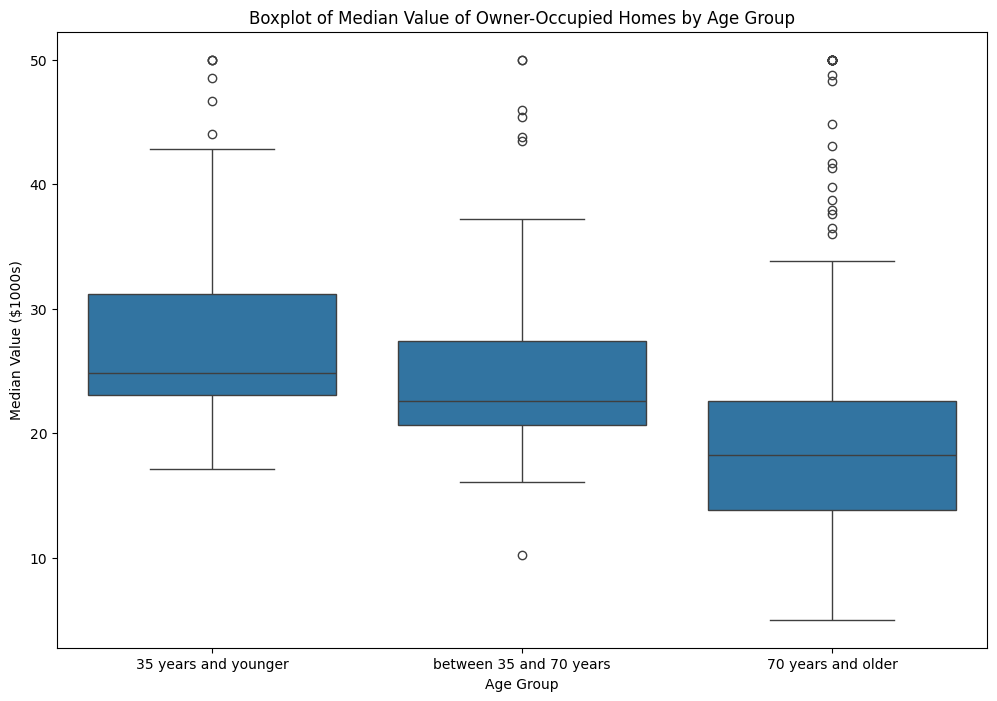

In [10]:
# Discretize the AGE variable
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

# Generate the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Owner-Occupied Homes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000s)')
plt.show()

Boxplot statystics as explanation:

In [11]:
# Print out statistics
age_groups = boston_df['AGE_Group'].unique()

for group in age_groups:
    group_data = boston_df[boston_df['AGE_Group'] == group]['MEDV']
    print(f"\nStatistics for {group}:")
    print(f"Count: {group_data.count()}")
    print(f"Mean: {group_data.mean():.2f}")
    print(f"Median: {group_data.median():.2f}")
    print(f"25th Percentile (Q1): {group_data.quantile(0.25):.2f}")
    print(f"75th Percentile (Q3): {group_data.quantile(0.75):.2f}")
    print(f"Standard Deviation: {group_data.std():.2f}")
    print(f"Min: {group_data.min()}")
    print(f"Max: {group_data.max()}")


Statistics for between 35 and 70 years:
Count: 128
Mean: 24.95
Median: 22.60
25th Percentile (Q1): 20.68
75th Percentile (Q3): 27.43
Standard Deviation: 6.97
Min: 10.2
Max: 50.0

Statistics for 70 years and older:
Count: 287
Mean: 19.79
Median: 18.20
25th Percentile (Q1): 13.80
75th Percentile (Q3): 22.55
Standard Deviation: 9.52
Min: 5.0
Max: 50.0

Statistics for 35 years and younger:
Count: 91
Mean: 27.78
Median: 24.80
25th Percentile (Q1): 23.05
75th Percentile (Q3): 31.15
Standard Deviation: 7.64
Min: 17.1
Max: 50.0


Conclusions: For homes 35 years and younger, they have the highest average ($27,780) and median ($24,800) values, with relatively low variability (SD = 7.64). Homes between 35 and 70 years have slightly lower average ($24,950) and median ($22,600) values, with the least variability (SD = 6.97), indicating consistent values. Homes 70 years and older have the lowest average ($19,790) and median ($18,200) values, with the highest variability (SD = 9.52), showing significant differences in value.

Newer homes are generally valued higher, with older homes showing more variability in their median values.

3. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

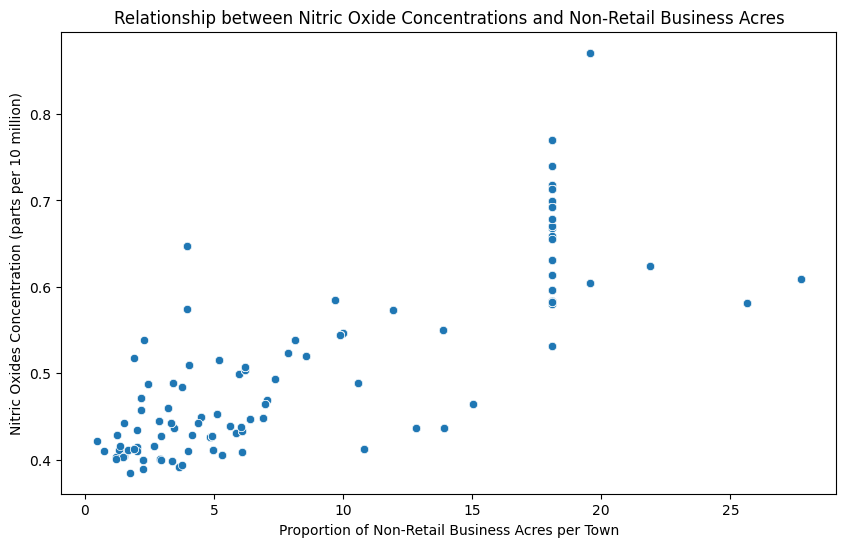

In [12]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Relationship between Nitric Oxide Concentrations and Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres per Town')
plt.ylabel('Nitric Oxides Concentration (parts per 10 million)')
plt.show()

Conclusions: The scatter plot shows a positive relationship between the proportion of non-retail business acres and Nitric oxide concentrations. As the proportion of non-retail business acres increases, the NOX concentration also tends to increase. There are clusters of data at lower INDUS values with lower NOX concentrations and some outliers at higher INDUS values with higher NOX concentrations, suggesting that industrial areas may contribute to higher air pollution levels.

4. Create a histogram for the pupil to teacher ratio variable.

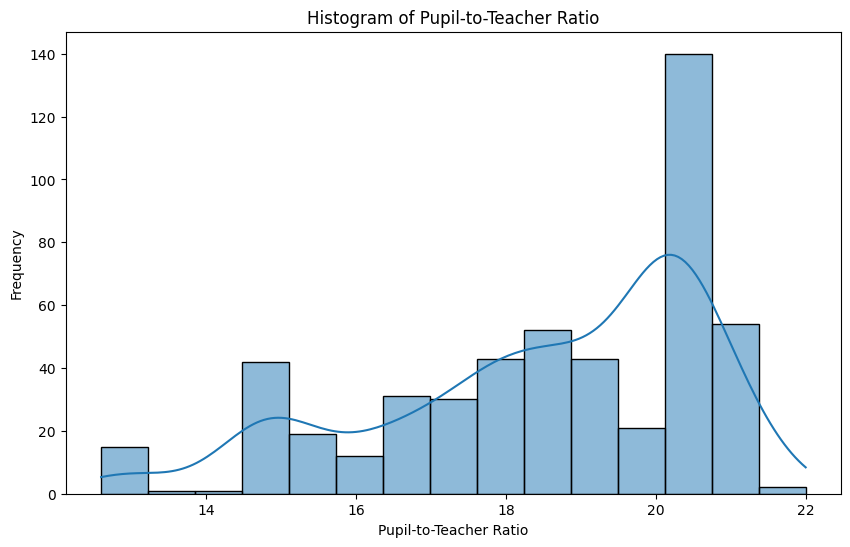

In [13]:
# Create a histogram for the pupil-to-teacher ratio variable
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
plt.title('Histogram of Pupil-to-Teacher Ratio')
plt.xlabel('Pupil-to-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

Conclusions: The histogram shows that most towns have a pupil-to-teacher ratio around 20, with fewer towns having lower or higher ratios. The distribution is right-skewed, indicating that while a ratio of 20 is typical, there is variability across towns in the dataset.

# Task 3: Use the appropriate tests to answer the questions provided.

5. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [14]:
from scipy.stats import ttest_ind

# Hypothesis
print("Hypothesis:")
print("H0: There is no significant difference in the median value of houses bounded by the Charles River compared to those not bounded by the Charles River.")
print("Ha: There is a significant difference in the median value of houses bounded by the Charles River compared to those not bounded by the Charles River.")
print("\nSignificance level (α): 0.05\n")

# Separate the data into two groups: houses bounded by the Charles River and those not
bounded_by_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bounded_by_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform an independent samples t-test
t_stat, p_value = ttest_ind(bounded_by_river, not_bounded_by_river)

# Print the results
print("Performing the T-test...")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Conclusion based on p-value
alpha = 0.05
if p_value < alpha:
    conclusion = "reject the null hypothesis"
else:
    conclusion = "fail to reject the null hypothesis"

print(f"Conclusion: We {conclusion}.")

Hypothesis:
H0: There is no significant difference in the median value of houses bounded by the Charles River compared to those not bounded by the Charles River.
Ha: There is a significant difference in the median value of houses bounded by the Charles River compared to those not bounded by the Charles River.

Significance level (α): 0.05

Performing the T-test...
T-statistic: 4.00
P-value: 0.0001
Conclusion: We reject the null hypothesis.


6. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [15]:
import pandas as pd
from scipy.stats import f_oneway

# Discretize the AGE variable into categories
bins = [0, 35, 70, 100]
labels = ['<= 35 years', '36-70 years', '> 70 years']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Hypothesis
print("Hypothesis:")
print("H0: There is no difference in the median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE).")
print("Ha: There is a difference in the median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE).")
print("\nSignificance level (α): 0.05\n")

# Perform ANOVA
grouped_data = [boston_df[boston_df['AGE_Group'] == label]['MEDV'] for label in labels]
f_stat, p_value = f_oneway(*grouped_data)

# Print the results
print("Performing ANOVA...")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Conclusion based on p-value
alpha = 0.05
if p_value < alpha:
    conclusion = "reject the null hypothesis"
else:
    conclusion = "fail to reject the null hypothesis"

print(f"Conclusion: We {conclusion}.\n")

Hypothesis:
H0: There is no difference in the median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE).
Ha: There is a difference in the median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE).

Significance level (α): 0.05

Performing ANOVA...
F-statistic: 36.41
P-value: 0.0000
Conclusion: We reject the null hypothesis.



Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [17]:
from scipy.stats import pearsonr

# Hypothesis
print("Hypothesis:")
print("H0: There is no relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).")
print("Ha: There is a relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).")
print("\nSignificance level (α): 0.05\n")

# Perform Pearson correlation
correlation_coefficient, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print the results
print("Performing Pearson Correlation...")
print(f"Correlation coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.4f}")

# Conclusion based on p-value
alpha = 0.05
if p_value < alpha:
    conclusion = "reject the null hypothesis"
else:
    conclusion = "fail to reject the null hypothesis"

print(f"Conclusion: We {conclusion}.")

Hypothesis:
H0: There is no relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).
Ha: There is a relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

Significance level (α): 0.05

Performing Pearson Correlation...
Correlation coefficient: 0.76
P-value: 0.0000
Conclusion: We reject the null hypothesis.


In [19]:
from scipy.stats import linregress

# Define the dependent and independent variables
X = boston_df['DIS']
y = boston_df['MEDV']

# Perform the regression analysis
slope, intercept, r_value, p_value, std_err = linregress(X, y)

# Print the results
print(f"Intercept: {intercept:.2f}")
print(f"Coefficient for DIS: {slope:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error: {std_err:.2f}")

# Conclusion based on p-value
print("\nInterpretation:")
print(f"The regression equation is: MEDV = {intercept:.2f} + ({slope:.2f} * DIS)")
print(f"An additional unit increase in the weighted distance to the five Boston employment centers (DIS) is associated with a change in the median value of owner-occupied homes (MEDV) by approximately {slope:.2f} thousand dollars.")

Intercept: 18.39
Coefficient for DIS: 1.09
R-squared: 0.06
P-value: 0.0000
Standard Error: 0.19

Interpretation:
The regression equation is: MEDV = 18.39 + (1.09 * DIS)
An additional unit increase in the weighted distance to the five Boston employment centers (DIS) is associated with a change in the median value of owner-occupied homes (MEDV) by approximately 1.09 thousand dollars.
